scratchbook of cdf models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import seaborn as sns

wisteria = "#9371af"
cashmere = "#4f718c"

In [2]:
database = Table.read('../Data/3.SNe+GalData.csv', format = "csv")
histTable = Table.read('../Data/3.HistData.csv', format='csv')  
allData = Table.read('../Data/3.4.AllData.csv', format='csv')

modelResults = Table.read("../Data/AllModels.csv", format = 'csv')

In [3]:
# Get list of cleaned SN type
SNtypes = []

for i in range(len(allData)):
    if len(allData["SN_type"][i]) < 2:
        SNtypes.append("Unclassified")
    elif allData["SN_type"][i][1]=="b":
        SNtypes.append("Ib")
    elif allData["SN_type"][i][1]=="c" :
        SNtypes.append("Ic")
    elif allData["SN_type"][i][1]=="I":
        SNtypes.append("II")    
    elif allData["SN_type"][i][1]=="a":
        SNtypes.append("Ia") 
    elif allData["SN_type"][i][1]=="n":
        SNtypes.append("Unclassified")
    else: 
        print("something fucked up")        
print(SNtypes)

def cleanHist(distArr, valArr, typeArr):
    # Remove nans and negative values from histogram
    cleanDist, cleanVals, cleanTypes = [],[],[]
    for i in range(len(distArr)):
        if np.isfinite(distArr[i]) and distArr[i] >= 0.0:
            cleanDist.append(distArr[i])
            cleanVals.append(valArr[i])
            cleanTypes.append(typeArr[i])
#     for i in range(len(cleanDist)):
#         if cleanDist[i] >= 1000:
#             cleanDist[i] = 1001
    return(cleanDist, cleanVals, cleanTypes)
            
Dist55, vals55, types55 = cleanHist(histTable["MCSN55Mass"],histTable["MCSN55Massval"], SNtypes)
#Dist65, vals65, types65 = cleanHist(histTable["MCSN65Mass"],histTable["MCSN65Massval"], SNtypes) 
weights55 = np.ones(len(Dist55))/len(Dist55)
#weights65 = np.ones(len(Dist65))/len(Dist65)

['II', 'Unclassified', 'II', 'II', 'Unclassified', 'Unclassified', 'Unclassified', 'Unclassified', 'Unclassified', 'Ia', 'II', 'II', 'II', 'II', 'II', 'II', 'II', 'Ia', 'Ib', 'Ic', 'II', 'II', 'Ia', 'II', 'II', 'II', 'II', 'Ia', 'Ia', 'II', 'Ia', 'II', 'II', 'II', 'II', 'II', 'II', 'II', 'Ic', 'Ic', 'Ia', 'Ia', 'II', 'II', 'II', 'Unclassified', 'II', 'II', 'Ia', 'II', 'II', 'Ia', 'Ia', 'II', 'Ic', 'Ia', 'II', 'II', 'Ib', 'II', 'Ib', 'II', 'II', 'II', 'Ia', 'Ic']


In [4]:
sample1 = [0,5,20,67,2,0,800,1]
sample2 = [6,234,6,234,900,0,0,1]

In [5]:
modelResults[0:1]

Galaxy,ModelNum,n55Mod1,n65Mod1,n55Mod2,n65Mod2,n55Mod3,n65Mod3
str8,int64,float64,float64,float64,float64,float64,float64
circinus,0,0.0,817.0086598637263,0.0,179.05203600001428,0.0,1498.0434816267868


Text(0.5, 0, 'Distance [pc]')

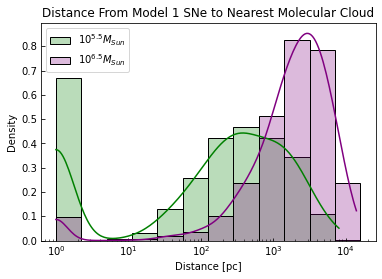

In [6]:
def cleanModels(modelData):
    keep = np.where(np.isfinite(modelData))
    clean = modelData[keep]
    clean = np.clip(clean, 1, None)
    clean = np.asarray(clean)
    return(clean)

n55m1 = cleanModels(modelResults["n55Mod1"])
n65m1 = cleanModels(modelResults["n65Mod1"])

fig = plt.figure(figsize = (6,4))
sns.histplot(n55m1, color = "green", stat = 'density', kde=True, log_scale=True, alpha = 0.27, binwidth = 0.35, label=r'$10^{5.5} M_{Sun}$')
sns.histplot(n65m1, color = "purple", stat = 'density', kde=True, log_scale=True, alpha = 0.27, binwidth=0.35, label=r'$10^{6.5} M_{Sun}$')
plt.legend(loc='best')
plt.tick_params(axis = "both", which = "both", direction = "in")
plt.title("Distance From Model 1 SNe to Nearest Molecular Cloud")
plt.xlabel("Distance [pc]")

Text(0.5, 0, 'Distance [pc]')

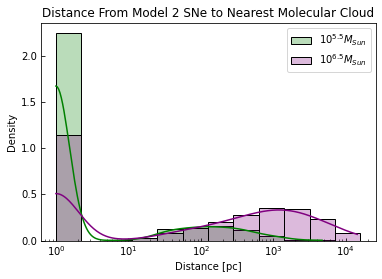

In [7]:
n55m2 = cleanModels(modelResults["n55Mod2"])
n65m2 = cleanModels(modelResults["n65Mod2"])

fig = plt.figure(figsize = (6,4))
sns.histplot(n55m2, color = "green", stat = 'density', kde=True, log_scale=True, alpha = 0.27, binwidth = 0.35, label=r'$10^{5.5} M_{Sun}$')
sns.histplot(n65m2, color = "purple",stat = 'density',  kde=True, log_scale=True, alpha = 0.27, binwidth=0.35, label=r'$10^{6.5} M_{Sun}$')
plt.legend(loc='best')
plt.tick_params(axis = "both", which = "both", direction = "in")
plt.title("Distance From Model 2 SNe to Nearest Molecular Cloud")
plt.xlabel("Distance [pc]")

Text(0.5, 0, 'Distance [pc]')

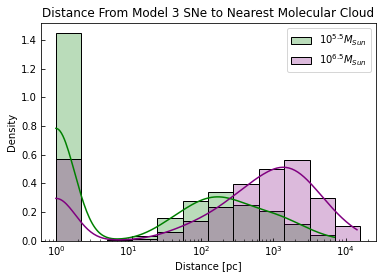

In [8]:
n55m3 = cleanModels(modelResults["n55Mod3"])
n65m3 = cleanModels(modelResults["n65Mod3"])

fig = plt.figure(figsize = (6,4))
sns.histplot(n55m3, color = "green", stat = 'density', kde=True, log_scale=True, alpha = 0.27, binwidth = 0.35, label=r'$10^{5.5} M_{Sun}$')
sns.histplot(n65m3, color = "purple",stat = 'density',  kde=True, log_scale=True, alpha = 0.27, binwidth=0.35, label=r'$10^{6.5} M_{Sun}$')
plt.legend(loc='best')
plt.tick_params(axis = "both", which = "both", direction = "in")
plt.title("Distance From Model 3 SNe to Nearest Molecular Cloud")
plt.xlabel("Distance [pc]")

['II', 'Unclassified', 'II', 'II', 'Unclassified', 'Unclassified', 'Unclassified', 'Unclassified', 'Ia', 'II', 'II', 'II', 'II', 'II', 'II', 'II', 'Ia', 'Ib', 'Ic', 'II', 'Ia', 'II', 'II', 'II', 'II', 'Ia', 'Ia', 'II', 'Ia', 'II', 'II', 'II', 'II', 'II', 'II', 'II', 'Ic', 'Ic', 'Ia', 'Ia', 'II', 'II', 'II', 'Unclassified', 'II', 'II', 'Ia', 'II', 'II', 'Ia', 'Ia', 'II', 'II', 'Ib', 'II', 'Ib', 'II', 'II', 'II', 'Ia', 'Ic']


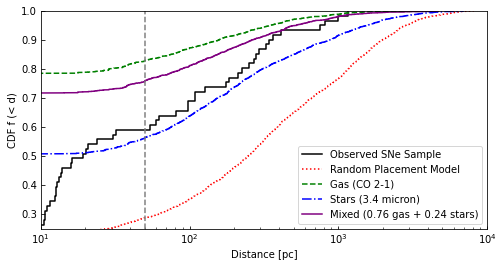

In [11]:
def cleanModels(modelData):
    keep = np.where(np.isfinite(modelData))
    clean = modelData[keep]
    #clean = np.clip(clean, 1, None)
    clean = np.asarray(clean)
    return(clean)

n55m1 = cleanModels(modelResults["n55Mod1"])
n65m1 = cleanModels(modelResults["n65Mod1"])
n55m2 = cleanModels(modelResults["n55Mod2"])
n65m2 = cleanModels(modelResults["n65Mod2"])
n55m3 = cleanModels(modelResults["n55Mod3"])
n65m3 = cleanModels(modelResults["n65Mod3"])
#n55m4 = cleanModels(modelResults["n55Mod4"])
# n65m4 = cleanModels(modelResults["n65Mod4"])
#print(len(n55m2), len(n55m3))
n55m4 = np.concatenate((n55m2[0:1914],n55m3[1914:-1]))
print(types55)
# dist55II, dist55Ib, dist55Ic, dist55Ibc, dist55Ia, distUnk = [],[],[],[],[],[]
# typeIa, typeIb, typeIc, typeIbc, typeII, typeUnk = [],[],[],[],[],[]
# for i in range(len(types55)):
#     if len(types55[i]) < 2:
#         typeUnk.append("Unclassified")
#         dist55Unk.append(Dist55[i])
#     elif types55[i][1] =="b": 
#         typeIb.append("Ib")
#         typeIbc.append("Ib")
#         dist55Ib.append(Dist55[i]) 
#         dist55Ibc.append(Dist55[i])
#     elif types55[i][1] =="c":
#         typeIc.append("Ic")
#         typeIbc.append("Ic")
#         dist55Ic.append(Dist55[i]) 
#         dist55Ibc.append(Dist55[i])    
#     elif types55[i][1] =="I":
#         typeII.append("II")
#         dist55II.append(Dist55[i])    
#     elif types55[i][1] =="a":
#         typeIa.append("Ia")
#         dist55Ia.append(Dist55[i]) 
#     elif types55[i][1] =="n":
#         typeUnk.append("Unclassified")
#         dist55Unk.append(Dist55[i])    
#     else: 
#         print("something fucked up")        

# typeII = np.sort(dist55II)
# yII = np.arange(0+ 1/len(typeII),1+ 1/len(typeII),1/(len(typeII)))
# typeIb = np.sort(dist55Ib)
# yIb = np.arange(0+ 1/len(typeIb),1+ 1/len(typeIb),1/(len(typeIb)))
# typeIc = np.sort(dist55Ic)
# yIc = np.arange(0+ 1/len(typeIc),1+ 1/len(typeIc),1/(len(typeIc)))
# typeIa = np.sort(dist55Ia)
# yIa = np.arange(0+ 1/len(typeIa),1+ 1/len(typeIa),1/(len(typeIa)))
# typeIbc = np.sort(dist55Ibc)
# yIbc = np.arange(0+ 1/len(typeIbc),1+ 1/len(typeIbc),1/(len(typeIbc)))
# print(typeII, yII)
# print(typeIb)


fig = plt.figure(figsize = (8,4))
sns.ecdfplot(Dist55,color = "black",  label="Observed SNe Sample")
sns.ecdfplot(n55m1, color = "red", ls = ":", label="Random Placement Model")
sns.ecdfplot(n55m2, color = "green",ls = "--",  label="Gas (CO 2-1)")
sns.ecdfplot(n55m3, color = "blue",  ls = "-.",label="Stars (3.4 micron)")
sns.ecdfplot(n55m4, color = "purple", ls = "-", label="Mixed (0.76 gas + 0.24 stars)")
plt.xscale('log')
plt.legend(loc='best')
plt.ylim (0.25,1.0)
plt.xlim(10,10000)

plt.axvline(x = 50,ymin = 0,ymax = 1, color='grey', ls = '--')
plt.tick_params(axis = "both", which = "both", direction = "in")
plt.ylabel("CDF f (< d)")
plt.xlabel("Distance [pc]")
fig.savefig("../Figures/ModelCDFs55.png", dpi=300)
plt.show()
plt.close()

In [10]:
print(typeIb, yIb)

fig = plt.figure(figsize = (16,8))
#sns.ecdfplot(Dist55,color = "black",  label="Real SNe Sample")
# sns.ecdfplot(dist55II, color = "orange", label = "Type II")
# sns.ecdfplot(dist55Ia, color = "brown", label = "Type Ia")
# sns.ecdfplot(dist55Ibc, color = "purple", label = "Type Ib/c")
sns.ecdfplot(n55m1, color = "red",  label="Random Model")
sns.ecdfplot(n55m2, color = "green",  label="Gas (CO 2-1)")
sns.ecdfplot(n55m3, color = "blue",  label="Stars (3.4 micron)")
sns.ecdfplot(n55m4, color = "purple",  label="Mixed (2/3 gas 1/3 stars)")
plt.xscale('log')
plt.legend(loc='best')
plt.ylim (0.0,1.0)
plt.xlim(0.1,10000)
plt.plot(typeII, yII, color = 'k', marker='*', ls="--", label="II")
plt.plot(typeIa, yIa, color = 'k', marker='o', ls="--", label="Ia")
plt.plot(typeIb, yIb, color = 'k', marker='d', ls="--", label="Ib")
plt.plot(typeIc, yIc, color = 'k', marker='s', ls="--", label="Ic")


plt.axvline(x = 50,ymin = 0,ymax = 1, color='grey', ls = '--')
plt.tick_params(axis = "both", which = "both", direction = "in")
plt.title("CD of Model Populations")
plt.xlabel("Distance [pc]")
fig.savefig("../Figures/ModelCDFs55typed.png", dpi=300)

NameError: name 'typeIb' is not defined

In [ ]:



n65m4 = np.concatenate((n65m2[0:1914],n65m3[1914:-1]))

fig = plt.figure(figsize = (6,4))
sns.ecdfplot(Dist65,color = "black",  label="Real SNe Sample")
sns.ecdfplot(n65m1, color = "red",  label="Random Model")
sns.ecdfplot(n65m2, color = "green",  label="Gas (CO 2-1)")
sns.ecdfplot(n65m3, color = "blue",  label="Stars (3.4 micron)")
sns.ecdfplot(n65m4, color = "purple",  label="Mixed (2/3 gas 1/3 stars)")
plt.xscale('log')
plt.legend(loc='best')
plt.ylim (0.05,1.0)
plt.xlim(10,10000)
plt.axvline(x = 50,ymin = 0,ymax = 1, color='grey', ls = '--')
plt.tick_params(axis = "both", which = "both", direction = "in")
plt.title("CD of Model Populations")
plt.xlabel("Distance [pc]")
fig.savefig("../Figures/ModelCDFs65.png", dpi=300)

In [ ]:


fig = plt.figure(figsize = (6,4))
sns.histplot(n55m4, color = "green", stat = 'density', kde=True, log_scale=True, alpha = 0.27, binwidth = 0.35, label=r'$10^{5.5} M_{Sun}$')
sns.histplot(n65m4, color = "purple",stat = 'density',  kde=True, log_scale=True, alpha = 0.27, binwidth=0.35, label=r'$10^{6.5} M_{Sun}$')
plt.legend(loc='best')
plt.tick_params(axis = "both", which = "both", direction = "in")
plt.title("Distance From Model 4 SNe to Nearest Molecular Cloud")
plt.xlabel("Distance [pc]")
